# Amazon Top 50 Bestselling Books Dataset 2009 - 2019
The purpose of this notebook is to do exploratory data analysis on the aforementioned dataset


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("bestsellers_with_categories.csv")

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


The minimum rating recieved by a best-selling book in this dataset is 3.3 and the maximum 4.9. The median is 4.7. The maximum number of reviews for a book are 87841 and the price range in this dataset is from 0-105 dollars.

In [7]:
df.describe(include='object')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


- We can see that there are 351 unique books in the dataset and "Publication Manual of the American Psychological Association, 6th Edition" appears in the dataset 10 times
- There are 248 unique Authors, with Jeff Kinney appearing 12 times in the dataset
- Finally the books are categorised into 'Fiction' and 'Non Fiction' Genre, with Non Fiction books appearing more frequently.

In [8]:
df[df.duplicated()]

,Name,Author,User Rating,Reviews,Price,Year,Genre


No duplicated values in the dataset

In [9]:
df[df.duplicated(subset=['Name', 'Author'])]

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


duplicated Name and Author appear because they are in best-selling list for multiple years.

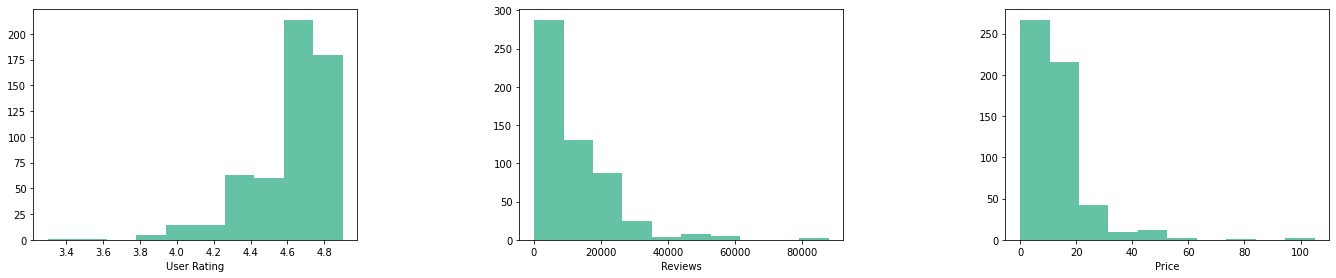

In [10]:
columns = ['User Rating', 'Reviews', 'Price']

sns.set_palette("Set2")
for i in range(len(columns)):
    plt.subplot(1,3, i+1)
    plt.hist(df[columns[i]])
    plt.xlabel(columns[i])
    
    plt.subplots_adjust(left=5,
                    bottom=0.1, 
                    right=8, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0)
plt.show()

The rating histogram is left skewed where as price and reviews are skewed to the right. Most of the user ratings higher than 4.4 and most books are priced under 20 dollars. 

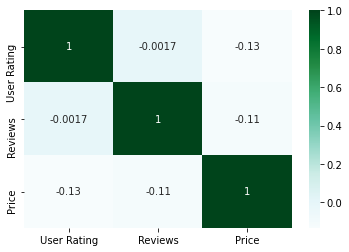

In [11]:
corr_matrix = df[columns].corr()

sns.heatmap(corr_matrix, annot = True, cmap='BuGn')

plt.show()

All three variables have a weak negative correlation to each other

### Books that received the highest and lowest number of reviews

In [12]:
df.nlargest(1,'Reviews')

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


<img src="https://images.squarespace-cdn.com/content/v1/5aadc6402714e55458f1f5b6/1541636731147-UJX7SIMOG639C0T9OV7Q/ke17ZwdGBToddI8pDm48kNEpiVsLpQjQs0wTAY9uX_EUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8PaoYXhp6HxIwZIk7-Mi3Tsic-L2IOPH3Dwrhl-Ne3Z2o99WW_NxFyU94gvwlcqX0QP8fX0J43DUGhd59T0-h88fdurHDt8XjyaGurlSWvQe/Where-the-Crawdads-Sing-3-1500.jpg?format=1000w" width="300">

In [13]:
df.nsmallest(1,'Reviews')

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


In [14]:
fiction = df[df['Genre'] == 'Fiction']
non_fiction = df[df['Genre'] == 'Non Fiction']

### Non-fiction book with most reviews 

In [15]:
non_fiction.nlargest(1, 'Reviews')

,Name,Author,User Rating,Reviews,Price,Year,Genre
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction


<img src="https://becomingmichelleobama.com/assets/img/MO_bookshot_v3.jpg" width="400">

### Most expensive book

In [16]:
df.nlargest(1,'Price')

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction


### Books per Genre

In [17]:
g = df.groupby(['Year', 'Genre'])['Name'].count()

In [18]:
g = g.reset_index()

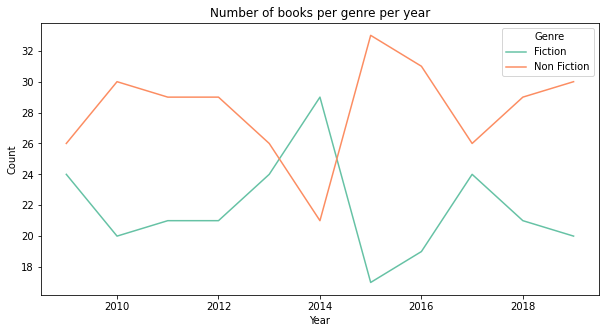

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Name', data=g, hue='Genre', ci=None)
plt.title('Number of books per genre per year')
plt.ylabel('Count');

Overall Non-Fiction books dominated the best-selling list except for in 2014

### User Rating analysis

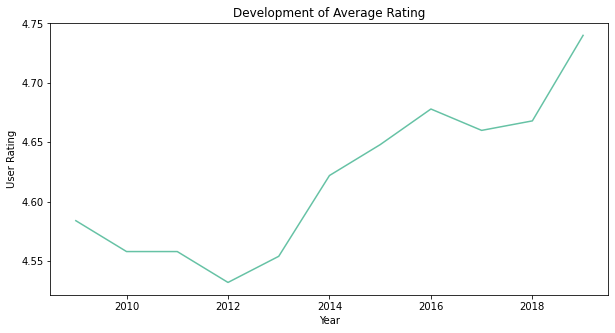

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='User Rating', data=df, ci=None)
plt.title('Development of Average Rating');

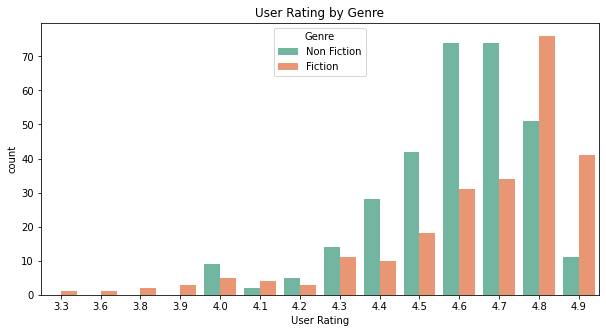

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x="User Rating", hue="Genre", data=df)
plt.title('User Rating by Genre');

### Price analysis

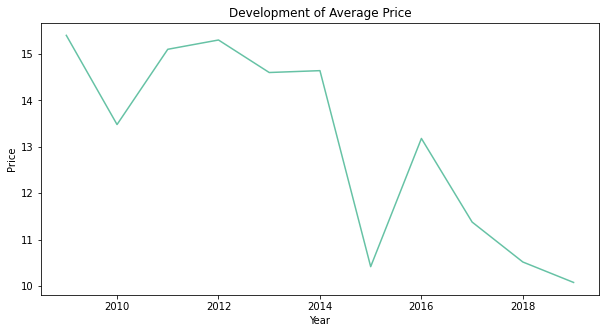

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Price', data=df, ci=None)
plt.title('Development of Average Price');

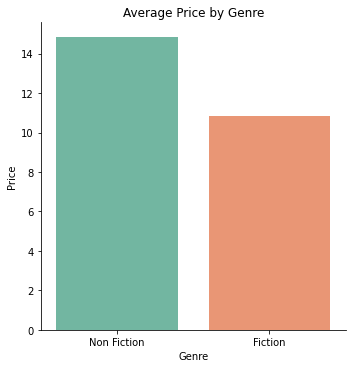

In [23]:
sns.catplot(x='Genre', y='Price', data=df, kind='bar', ci=None)
plt.title('Average Price by Genre');

### Reviews analysis

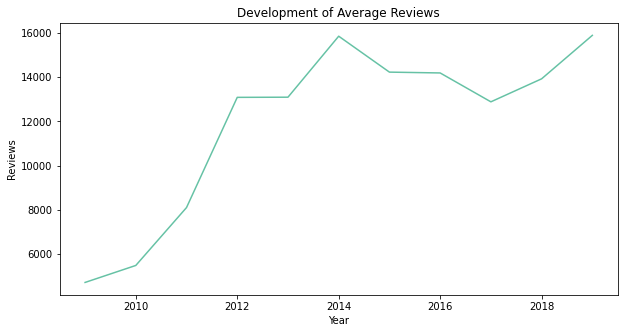

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Reviews', data=df, ci=None)
plt.title('Development of Average Reviews');

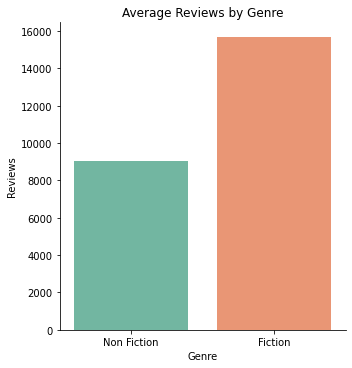

In [25]:
sns.catplot(x='Genre', y='Reviews', data=df, kind='bar', ci=None)
plt.title('Average Reviews by Genre');

### Highest Rated Books

In [26]:
highest_rated = df[df['User Rating'] == 4.9].drop_duplicates(subset=['Name'])

In [27]:
highest_rated.shape

(28, 7)

In [28]:
highest_rated['Name']

40              Brown Bear, Brown Bear, What Do You See?
81     Dog Man and Cat Kid: From the Creator of Capta...
82     Dog Man: A Tale of Two Kitties: From the Creat...
83     Dog Man: Brawl of the Wild: From the Creator o...
85     Dog Man: Fetch-22: From the Creator of Captain...
86     Dog Man: For Whom the Ball Rolls: From the Cre...
87     Dog Man: Lord of the Fleas: From the Creator o...
146    Goodnight, Goodnight Construction Site (Hardco...
151                             Hamilton: The Revolution
153    Harry Potter and the Chamber of Secrets: The I...
155    Harry Potter and the Goblet of Fire: The Illus...
156    Harry Potter and the Prisoner of Azkaban: The ...
157    Harry Potter and the Sorcerer's Stone: The Ill...
174                         Humans of New York : Stories
187    Jesus Calling: Enjoying Peace in His Presence ...
207    Last Week Tonight with John Oliver Presents A ...
219                                    Little Blue Truck
244                          Ob

## Popular books
lets check the top 5 books that recevied the most reviews by Genre

In [29]:
unique_non_fiction = non_fiction.drop_duplicates(subset='Name').nlargest(5,['Reviews', 'User Rating'])

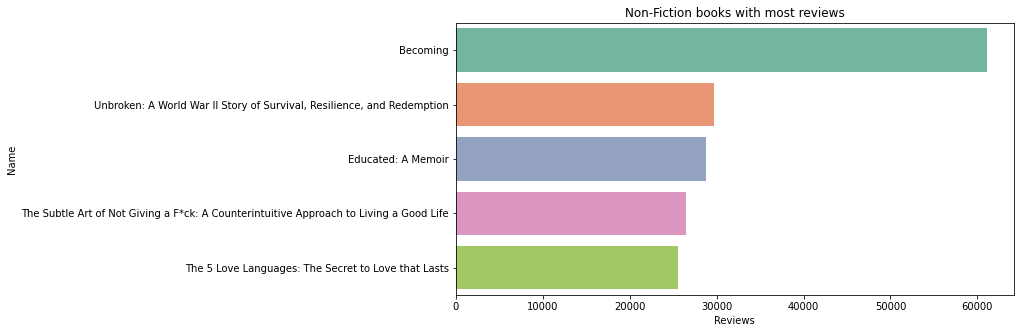

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='Reviews', y='Name', data=unique_non_fiction, )
plt.title('Non-Fiction books with most reviews');

In [31]:
unique_fiction = fiction.drop_duplicates(subset='Name').nlargest(5,['Reviews', 'User Rating'])

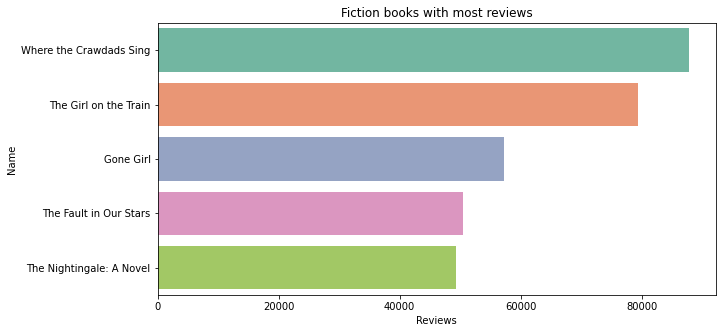

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='Reviews', y='Name', data=unique_fiction, )
plt.title('Fiction books with most reviews');

### 10 Books that appeared the most number of times on best seller list

In [33]:
multiple_appearance = df['Name'].value_counts().nlargest(10)

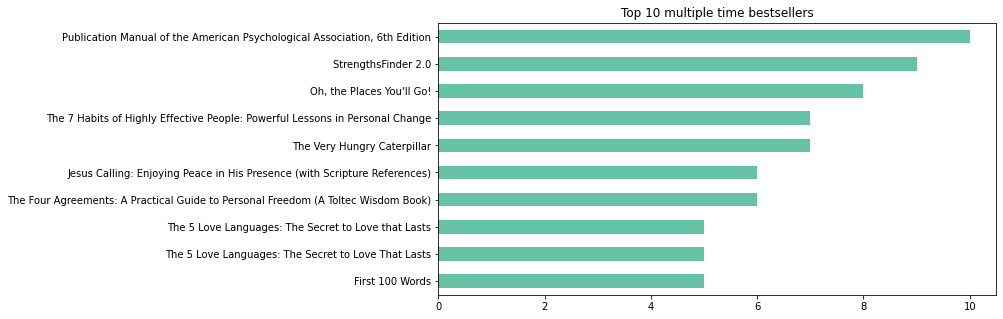

In [34]:
plt.figure(figsize=(10,5))
multiple_appearance.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 multiple time bestsellers');

### Top 12 Authors by number of books appearing in the best-selling list

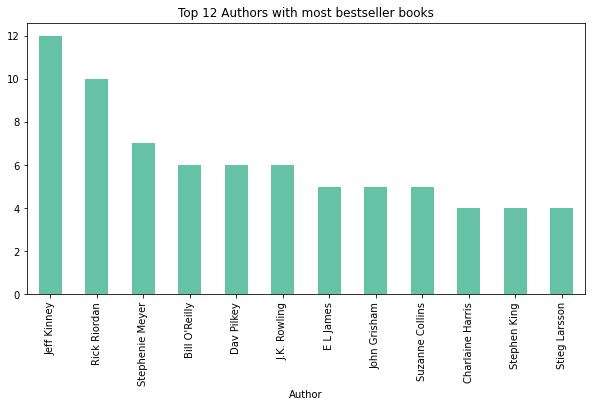

In [39]:
plt.figure(figsize=(10,5))
df.groupby('Author')['Name'].nunique().nlargest(12).plot(kind='bar')
plt.title('Top 12 Authors with most bestseller books');

### Conclusion

In this notebook we observed:
1. The most popular books.
2. How average price, ratings and reviews developed over time and differed between fiction and non-fiction books.
3. We also looked at the top 12 authors who had the most number of books in the amazon bestselling dataset.
